In [21]:
#setup
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from IPython.display import display

from sklearn.decomposition import PCA

## Zadanie 4. (2 punkty)
Zmień metodę rozpoznawania twarzy z poprzedniego zadania w taki sposób, że zamiast pracować w przestrzeni R4920 będziemy pracować w przestrzeni mniej wymiarowej (wyznaczonej przez redukcję wymiarowości pierwszego zestawu danych metodą PCA). Porównaj tę metodę z metodą oryginalną (używając do testów drugiego zestawu danych). Dokładnie przeanalizuj wyniki.

In [2]:
def nearest(img):
    err = ((train_proj - img)**2).mean(axis=1)
    if err.min() < epsilon:
        return err.argmin() // 5
    return None

In [3]:
train = pd.read_csv('data/ri_train.csv', header=None).T.astype(np.uint8).values
test = pd.read_csv('data/ri_test.csv', header=None).T.astype(np.uint8).values

In [18]:
dims = np.arange(10, len(train), 10)
df = pd.DataFrame({'dims': [], 'test_err': [], 'unclass_rate': [], 'missclass_rate': []})

In [19]:
for d in dims:
    pca = PCA(d, whiten=True)
    train_proj = pca.fit_transform(train)
    test_proj = pca.transform(test)
    
    
    err = 0
    for i in range(len(train_proj)):
        if i%5 == 0:
            arr = train_proj[i:i+5]
        idx = i%5

        err += (((arr[:idx] - arr[idx])**2).sum() + ((arr[idx+1:] - arr[idx])**2).sum())\
            / (4 * train_proj.shape[1])
    epsilon = 1.6 * err / len(train_proj)
    

    miss_te = none_te = 0
    for i in range(len(test_proj)):
        pred = nearest(test_proj[i])
        if pred != i//2:
            if pred == None:
                none_te += 1
            else:
                miss_te += 1
        
    err_tr /= len(train_proj)
    none_te /= len(test_proj)
    miss_te /= len(test_proj)
    
    df.loc[len(df)] = [d, none_te + miss_te, none_te, miss_te]

In [20]:
df

,dims,test_err,unclass_rate,missclass_rate
0,10.0,1.00,0.68,0.32
1,20.0,0.98,0.86,0.12
2,30.0,0.94,0.80,0.14
3,40.0,0.65,0.52,0.13
4,50.0,0.48,0.32,0.16
5,60.0,0.18,0.06,0.12
6,70.0,0.14,0.02,0.12
7,80.0,0.08,0.02,0.06
8,90.0,0.10,0.02,0.08
9,100.0,0.07,0.01,0.06


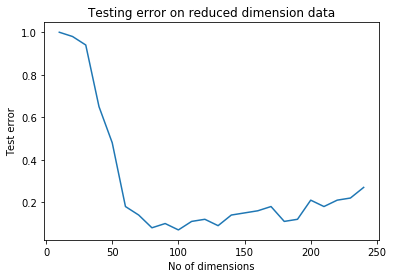

In [24]:
plt.title('Testing error on reduced dimension data')
plt.xlabel('No of dimensions')
plt.ylabel('Test error')
plt.plot(df['dims'], df['test_err'])
None